In [1]:
import pandas as pd
import numpy as np 
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

In [2]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\djasb\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
data = pd.read_csv('C:\\Users\\djasb\\Documents\\school\\2021W1\\LING242\\youtube_sentimental_analysis\\data\\dog.csv', error_bad_lines=False)

C:\Users\djasb\AppData\Local\Programs\Python\Python37-32\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
comments = data['comment']

In [5]:
SIA = SentimentIntensityAnalyzer()

In [6]:
nltk_sentiments_dict =  {t : SIA.polarity_scores(t) for t in comments}

In [7]:
df = pd.DataFrame(nltk_sentiments_dict.items())

Text(0.5, 1.0, 'compound polarity scores')

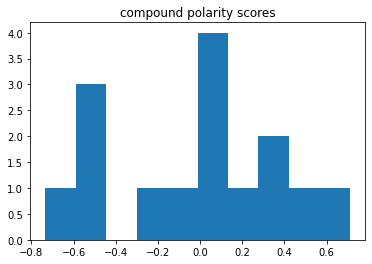

In [8]:
plt.hist([t['compound'] for t in nltk_sentiments_dict.values()])
plt.title("compound polarity scores")

Text(0.5, 1.0, 'positive polarity scores')

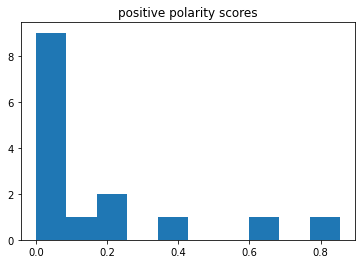

In [9]:
plt.hist([t['pos'] for t in nltk_sentiments_dict.values()])
plt.title("positive polarity scores")

Text(0.5, 1.0, 'negative polarity scores')

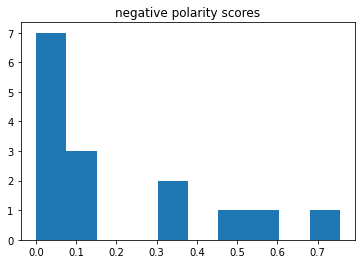

In [10]:
plt.hist([t['neg'] for t in nltk_sentiments_dict.values()])
plt.title("negative polarity scores")